In [1]:
import datetime
import math
import os
import numpy as np
import pandas as pd

import matplotlib.dates as mdates
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(rc={'figure.figsize':(11, 4)})

#https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/

In [2]:
def plot_measures(values,labels,titulo, x_rotation, fig_size=(8,8)):
        
    ind = np.arange(len(labels))  # the x locations for the groups
    width = 0.45  # the width of the bars

    fig, ax = plt.subplots(figsize=fig_size)
    rects1 = ax.bar(ind, values, width,color='SkyBlue')
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Conteos')
    ax.set_title(titulo)
    ax.set_xticks(ind)
    ax.set_xticklabels(labels,rotation = x_rotation)
    
    autolabel(rects1,ax, "center")
    plt.show()
    
def autolabel(rects, ax,xpos='center'):
    xpos = xpos.lower()  # normalize the case of the parameter
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,
                height, ha=ha[xpos], va='bottom')    

In [3]:
data_dir = os.path.join('data xm','Generación','Generación')
data_list = list()
real_columns_names = ['Fecha','Recurso','Tipo Generación','Combustible','Código Agente','Tipo Despacho','Es Menor',
                      'Es Autogenerador','0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16',
                      '17','18','19','20','21','22','23','Version']

In [4]:
shape_count = 0
for root, dirs, files in os.walk(data_dir, topdown=False):
    for file in files:
        f = pd.read_excel(os.path.join(root,file))
        f.columns = real_columns_names
        shape_count += f.shape[0]
        data_list.append(f)
        print(os.path.join(root,file),f.shape)

data xm\Generación\Generación\Generacion_(kWh)_1995.xlsx (13804, 33)
data xm\Generación\Generación\Generacion_(kWh)_1996.xlsx (28466, 33)
data xm\Generación\Generación\Generacion_(kWh)_1997.xlsx (28895, 33)
data xm\Generación\Generación\Generacion_(kWh)_1998.xlsx (30419, 33)
data xm\Generación\Generación\Generacion_(kWh)_1999.xlsx (24655, 33)
data xm\Generación\Generación\Generacion_(kWh)_2000.xlsx (18749, 33)
data xm\Generación\Generación\Generacion_(kWh)_2001.xlsx (26008, 33)
data xm\Generación\Generación\Generacion_(kWh)_2002.xlsx (28229, 33)
data xm\Generación\Generación\Generacion_(kWh)_2003.xlsx (32055, 33)
data xm\Generación\Generación\Generacion_(kWh)_2004.xlsx (35981, 33)
data xm\Generación\Generación\Generacion_(kWh)_2005.xlsx (37547, 33)
data xm\Generación\Generación\Generacion_(kWh)_2006.xlsx (38661, 33)
data xm\Generación\Generación\Generacion_(kWh)_2007.xlsx (40578, 33)
data xm\Generación\Generación\Generacion_(kWh)_2008.xlsx (40835, 33)
data xm\Generación\Generación\Gene

In [11]:
full_data = pd.concat(data_list)
assert shape_count == full_data.shape[0], 'No coinciden las dimensiones'

In [ ]:
full_data.dropna(inplace=True,how='all')

In [12]:
full_data.shape

(988404, 33)

In [13]:
full_data.columns

Index(['Fecha', 'Recurso', 'Tipo Generación', 'Combustible', 'Código Agente',
       'Tipo Despacho', 'Es Menor', 'Es Autogenerador', '0', '1', '2', '3',
       '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16',
       '17', '18', '19', '20', '21', '22', '23', 'Version'],
      dtype='object')

# Recursos

In [14]:
datos_copy = full_data.copy()

In [15]:
recursos_unicos = pd.unique(datos_copy['Recurso'])

In [16]:
'Cantidad de Recursos Unicos: {}'.format(len(recursos_unicos))

'Cantidad de Recursos Unicos: 804'

In [17]:
recursos_unicos_conteo = datos_copy.groupby('Recurso')['Fecha'].count()
recursos_unicos_conteo = recursos_unicos_conteo.sort_values(ascending=False)

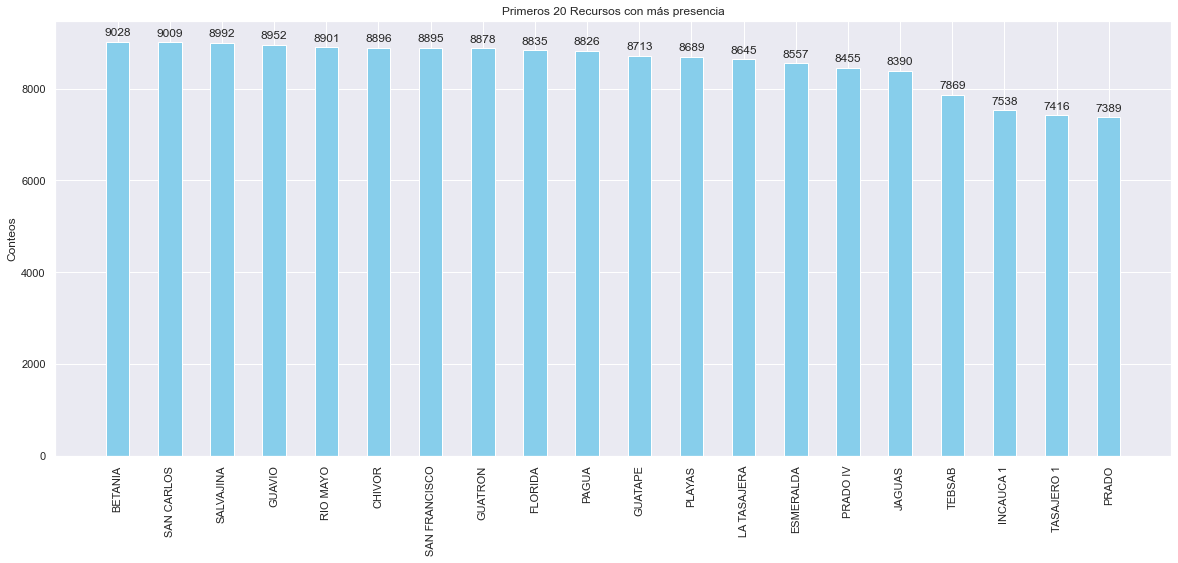

In [18]:
recursos_unicos_primeros = recursos_unicos_conteo[:20]
values = recursos_unicos_primeros.values
labels = recursos_unicos_primeros.index
plot_measures(values,labels,'Primeros 20 Recursos con más presencia',x_rotation=90,fig_size=(20,8))

### Contamos cuantos recursos unicos hay juntando aquellos que tienen los nombres numerados

In [19]:
def agrupar_por_fecha_recurso(grupo):
    
    tipo_generación = grupo['Tipo Generación'].tolist()[0]
    combustible = grupo['Combustible'].tolist()[0]
    codigo_agente = grupo['Código Agente'].tolist()[0]
    tipo_despacho = grupo['Tipo Despacho'].tolist()[0]
    es_menor = grupo['Es Menor'].tolist()[0]
    es_autogenerador = grupo['Es Autogenerador'].tolist()[0]
    version = grupo['Version'].tolist()[0]
    
    columnas_horas = [str(i) for i in np.arange(24)]
    columnas_horas_suma = grupo[columnas_horas].sum()
     
    c = ['Tipo Generación','Combustible','Código Agente','Tipo Despacho','Es Menor','Es Autogenerador']
    S1 = pd.Series([tipo_generación,combustible,codigo_agente,tipo_despacho,es_menor,es_autogenerador],index=c)
    S1 = S1.append(columnas_horas_suma)
    S1 = S1.append(pd.Series([version],index=['Version']))

    return S1

In [20]:
datos_copy['Recurso'] = datos_copy['Recurso'].str.replace('\d+', '')
datos_copy['Recurso'] = datos_copy['Recurso'].str.replace(r'(?=\b[MDCLXVI]+\b)M{0,4}(?:CM|CD|D?C{0,3})(?:XC|XL|L?X{0,3})(?:IX|IV|V?I{0,3})', '')
datos_copy['Recurso'] = datos_copy['Recurso'].map(lambda x: x.strip(' '))

In [21]:
recursos_unicos = pd.unique(datos_copy['Recurso'])
'Cantidad de Recursos Unicos: {}'.format(len(recursos_unicos))

'Cantidad de Recursos Unicos: 259'

In [22]:
recursos_unicos_conteo = datos_copy.groupby('Recurso')['Fecha'].count()
recursos_unicos_conteo = recursos_unicos_conteo.sort_values(ascending=False)

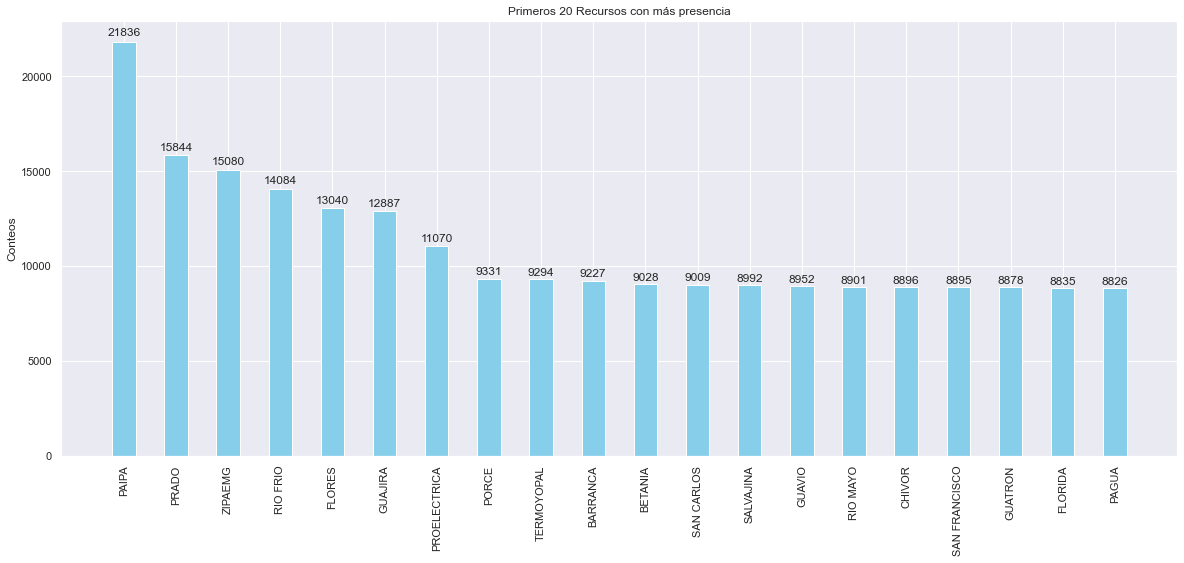

In [23]:
recursos_unicos_primeros = recursos_unicos_conteo[:20]
values = recursos_unicos_primeros.values
labels = recursos_unicos_primeros.index
plot_measures(values,labels,'Primeros 20 Recursos con más presencia',x_rotation=90,fig_size=(20,8))

In [24]:
datos_agrupados = datos_copy.groupby(['Fecha','Recurso']).apply(agrupar_por_fecha_recurso)

In [25]:
datos_agrupados = datos_agrupados.reset_index()

In [26]:
fecha_idx = datos_agrupados[datos_agrupados['Fecha'] == 'Fecha'].index

In [27]:
datos_agrupados = datos_agrupados.drop(index=fecha_idx)

# Tipos de Generación

In [28]:
datos_agrupados_copy = datos_agrupados.copy()

In [29]:
tipos_generacion_unicos = pd.unique(datos_agrupados_copy['Tipo Generación'])

In [30]:
'Cantidad de Tipos de Generación Unicos: {}'.format(len(tipos_generacion_unicos))

'Cantidad de Tipos de Generación Unicos: 6'

In [31]:
tipos_generacion_unicos_conteo = datos_agrupados_copy.groupby('Tipo Generación')['Fecha'].count()
tipos_generacion_unicos_conteo = tipos_generacion_unicos_conteo.sort_values(ascending=False)

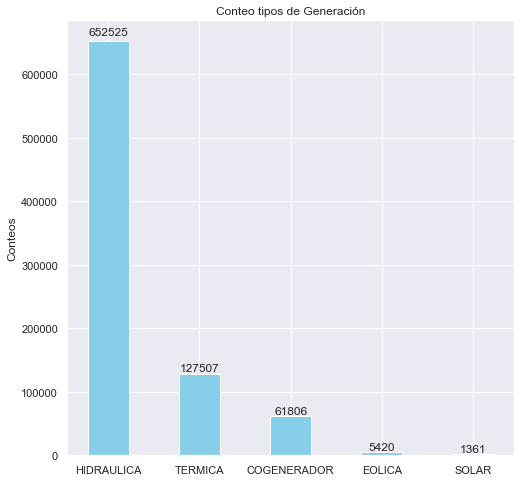

In [32]:
values = tipos_generacion_unicos_conteo.values
labels = tipos_generacion_unicos_conteo.index
plot_measures(values,labels,'Conteo tipos de Generación',x_rotation=0)

# Combustible

In [33]:
datos_agrupados_copy = datos_agrupados.copy()

In [34]:
combustible_unicos = pd.unique(datos_agrupados_copy['Combustible'])
'Cantidad de Tipos de despacho Unicos: {}'.format(len(combustible_unicos))

'Cantidad de Tipos de despacho Unicos: 15'

In [35]:
combustible_unicos_conteo = datos_agrupados_copy.groupby('Combustible')['Fecha'].count()
combustible_unicos_conteo = combustible_unicos_conteo.sort_values(ascending=False)

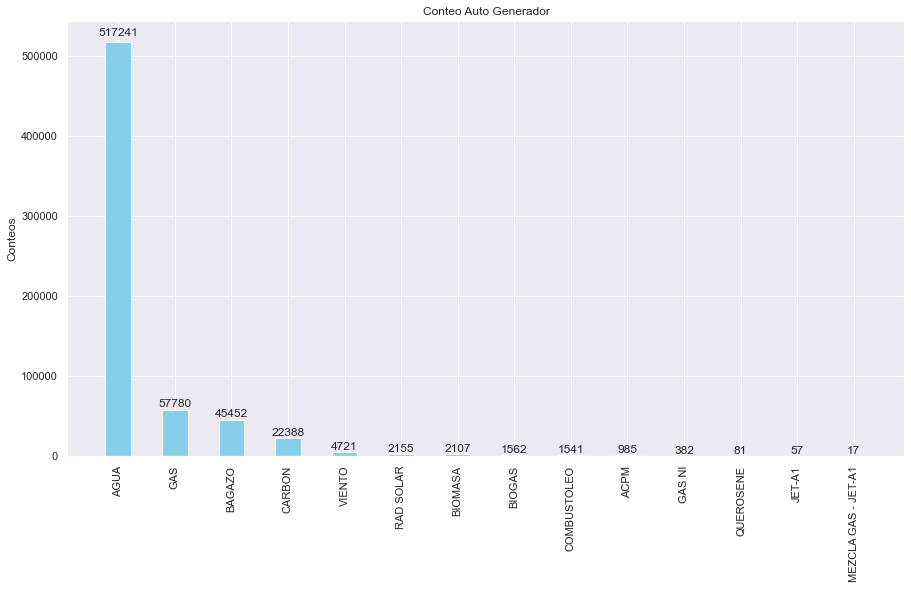

In [36]:
values = combustible_unicos_conteo.values
labels = combustible_unicos_conteo.index
plot_measures(values,labels,'Conteo Auto Generador',x_rotation=90,fig_size=(15,8))

# Tipo Despacho

In [37]:
datos_agrupados_copy = datos_agrupados.copy()

In [38]:
tipo_despacho_unicos = pd.unique(datos_agrupados_copy['Tipo Despacho'])
'Cantidad de Tipos de despacho Unicos: {}'.format(len(tipo_despacho_unicos))

'Cantidad de Tipos de despacho Unicos: 6'

In [39]:
tipos_despacho_unicos_conteo = datos_agrupados_copy.groupby('Tipo Despacho')['Fecha'].count()
tipos_despacho_unicos_conteo = tipos_despacho_unicos_conteo.sort_values(ascending=False)

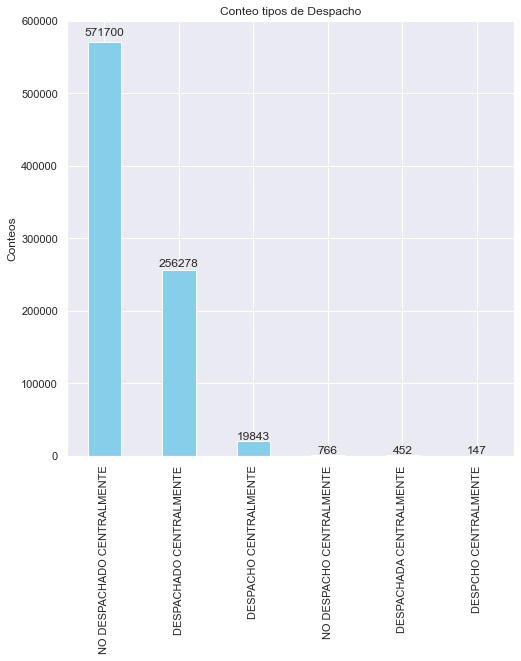

In [40]:
values = tipos_despacho_unicos_conteo.values
labels = tipos_despacho_unicos_conteo.index
plot_measures(values,labels,'Conteo tipos de Despacho',x_rotation=90)

# Auto Generador

In [41]:
datos_agrupados_copy = datos_agrupados.copy()

In [42]:
autogenerador_unicos = pd.unique(datos_agrupados_copy['Es Autogenerador'])
'Cantidad de Tipos de despacho Unicos: {}'.format(len(autogenerador_unicos))

'Cantidad de Tipos de despacho Unicos: 3'

In [43]:
autogenerador_unicos_conteo = datos_agrupados_copy.groupby('Es Autogenerador')['Fecha'].count()
autogenerador_unicos_conteo = autogenerador_unicos_conteo.sort_values(ascending=False)

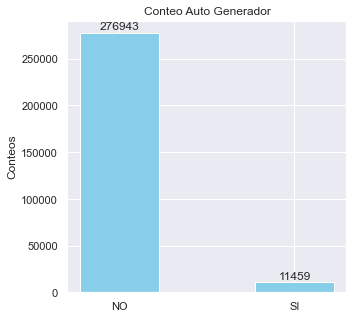

In [44]:
values = autogenerador_unicos_conteo.values
labels = autogenerador_unicos_conteo.index
plot_measures(values,labels,'Conteo Auto Generador',x_rotation=0,fig_size=(5,5))

# GENERAR DATASET CON SERIE POR TIPO GENERACION

In [75]:
def construir_dataset_tipo_generacion(df_transpuesto):
    lambda_horas = lambda x: pd.Timedelta(datetime.datetime.strptime(x,'%H').hour, unit='hours')
    
    df_transpuesto['Fecha'] =  pd.to_datetime(df_transpuesto['Fecha'], format='%Y-%m-%d')
    df_transpuesto['variable'] = df_transpuesto['variable'].map(lambda_horas)
    
    df_transpuesto['Fecha'] = df_transpuesto['Fecha'] +  df_transpuesto['variable']
    df_transpuesto = df_transpuesto.sort_values(['Recurso','Fecha'])
    df_transpuesto.drop('variable', axis=1, inplace = True)
    df_transpuesto.rename(columns={"value": "kWh"}, inplace = True)
    
    return df_transpuesto

In [46]:
def dividir_guardar_dataset(dataset,dataset_path,dataset_name):
    maximas_filas_excel = 1048576
    filas_dataset = dataset.shape[0]
    divisiones = 1
    
    if filas_dataset > maximas_filas_excel:
        divisiones = math.ceil(filas_dataset/maximas_filas_excel)
        
    lista_dataset = np.array_split(dataset, divisiones)
    for idx,df in enumerate(lista_dataset):
        df.to_excel(os.path.join(dataset_path,'{}_{}.xlsx'.format(dataset_name,idx)))
        print('---> Tamaño División: {}'.format(df.shape))

In [47]:
datos_agrupados_copy = datos_agrupados.copy()

In [48]:
tipos_generacion_unicos = pd.unique(datos_agrupados_copy['Tipo Generación'])

In [49]:
tipos_generacion_unicos = [i for i in tipos_generacion_unicos if not isinstance(i, float)]
tipos_generacion_unicos

['HIDRAULICA', 'TERMICA', 'COGENERADOR', 'EOLICA', 'SOLAR']

In [90]:
df_hidraulica = None
for i in ['HIDRAULICA', 'TERMICA', 'COGENERADOR','EOLICA', 'SOLAR']:
    print('{}'.format(i))
    
    df_tipo_generacion = datos_agrupados_copy[datos_agrupados_copy['Tipo Generación']==i].copy()
    
    df_transpuesto = pd.melt(df_tipo_generacion,
                         id_vars=['Fecha', 'Recurso', 'Tipo Generación', 'Combustible', 'Código Agente',
                                  'Tipo Despacho', 'Es Menor', 'Es Autogenerador','Version'],
                         value_vars=['0', '1', '2', '3','4', '5', '6', '7', '8', '9', '10', '11', '12',
                                     '13', '14', '15', '16','17', '18', '19', '20', '21', '22', '23'])

    dataset_tipo_generacion = construir_dataset_tipo_generacion(df_transpuesto)
    
    if 'HIDRAULICA' in i:
        df_hidraulica = dataset_tipo_generacion
    
    break
    dataset_path = os.path.join('data series','Generacion')
    if not os.path.exists(dataset_path):
        os.makedirs(dataset_path)
        
    dividir_guardar_dataset(dataset_tipo_generacion,dataset_path,dataset_name=i)

HIDRAULICA


# Visualización de los datos

In [77]:
def obtener_datos_por_recurso(data,nombre_recurso):
    
    datos_recurso = data[data['Recurso'] == nombre_recurso]
    datos_recurso = datos_recurso.copy()

    datos_recurso = datos_recurso.set_index('Fecha')
    
    datos_recurso['Año'] = datos_recurso.index.year
    datos_recurso['Mes'] = datos_recurso.index.month
    datos_recurso['Dia'] = datos_recurso.index.day_name()
    
    return datos_recurso

In [78]:
def grafico_comportamiento(datos):
    cols_plot = ['kWh']
    nombre_graficas = ['kWh']
    axes = datos[cols_plot].plot(alpha=0.8, linestyle='-', figsize=(15, 5), subplots=True)
    for ax,name in zip(axes,nombre_graficas):
        ax.set_ylabel(name)

In [79]:
def grafico_comportamiento_por_mes(datos):
    fig, ax = plt.subplots(1, 1, figsize=(15, 5), sharex=True)
    
    sns.boxplot(data=datos, x='Mes', y='kWh', ax=ax)
    ax.set_title('kWh')

In [80]:
def grafico_filtrado_fecha(datos,fecha_min,fecha_max):
    ax = datos.loc[fecha_min:fecha_max, 'kWh'].plot(marker='o',linestyle='-',figsize=(15, 5))
    ax.set_ylabel('kWh');

In [81]:
def grafico_resampling_rolling_window(datos,fecha_min,fecha_max):
    cols_plot = ['kWh']
    datos_7d = datos[cols_plot].rolling(7, center=True).mean()

    fig, ax = plt.subplots(figsize=(15, 5))

    ax.plot(datos.loc[fecha_min:fecha_max, 'kWh'],
    marker='.', linestyle='-', linewidth=0.5, label='Diaria')

    ax.plot(datos_7d.loc[fecha_min:fecha_max, 'kWh'],linestyle='-', label='Media Movil 7-Días')

    ax.set_ylabel('kWh')
    ax.legend();

In [99]:
recurso = obtener_datos_por_recurso(df_hidraulica,nombre_recurso='TEQUENDAMA')

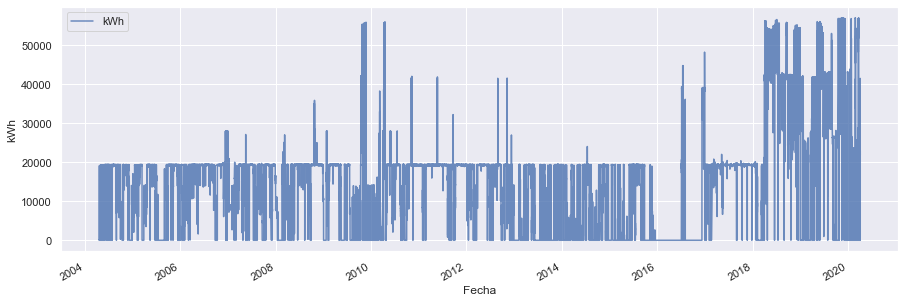

In [100]:
grafico_comportamiento(recurso)

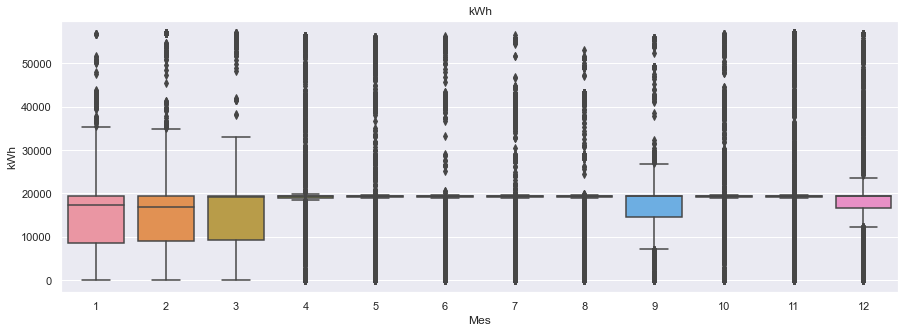

In [101]:
grafico_comportamiento_por_mes(recurso)

In [102]:
'Fecha Mínima {} - Fecha Máxima {}'.format(recurso.index.min(),recurso.index.max())

'Fecha Mínima 2004-04-22 00:00:00 - Fecha Máxima 2020-04-04 23:00:00'

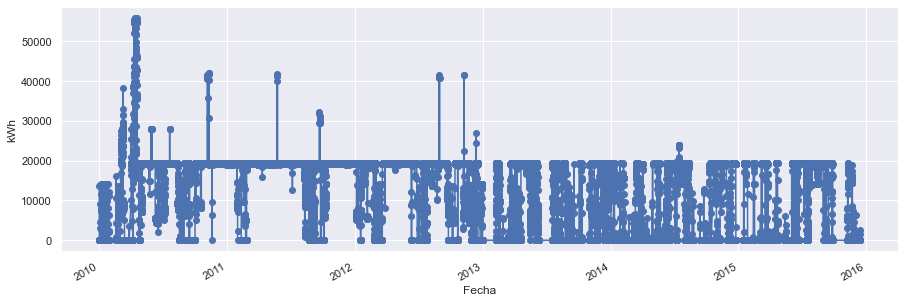

In [103]:
grafico_filtrado_fecha(datos=recurso,fecha_min='2010-01',fecha_max='2015-12')

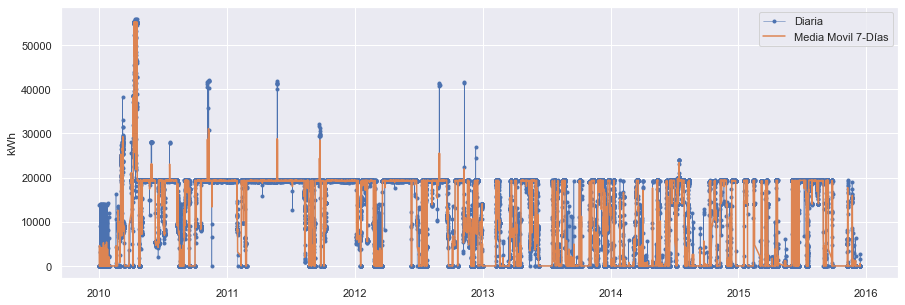

In [104]:
grafico_resampling_rolling_window(datos=recurso,fecha_min='2010-01',fecha_max='2015-12')